In [1]:
# 1 initiation

In [10]:
%pwd

u'/home/ubuntu/nbs/fish/fish_classification/data/sample/sample'

In [4]:
from theano.sandbox import cuda

In [5]:
%cd /home/ubuntu/nbs/fish/fish_classification/
import os, sys
current_dir = os.getcwd()
LESSON_HOME_DIR = current_dir
DATA_HOME_DIR = current_dir

DATA_HOME_DIR

sys.path.insert(1, os.path.join(sys.path[0], '..'))
import vgg16, utils
import utils; reload(utils)
from utils import *
from vgg16 import Vgg16
from vgg16bn import Vgg16BN
from utils import vgg_ft
import glob
import numpy as np
from utils import save_array
%matplotlib inline

%cd $DATA_HOME_DIR
path = DATA_HOME_DIR + '/data/'
test_path = path + '/test/' 
results_path = DATA_HOME_DIR + 'results/'
sample_path = path + '/sample/'
train_path = path + '/train/'
valid_path = path + '/valid/'
model_path = path + '/models/'
path, test_path, results_path, train_path, model_path

/home/ubuntu/nbs/fish/fish_classification


Using Theano backend.


/home/ubuntu/nbs/fish/fish_classification


('/home/ubuntu/nbs/fish/fish_classification/data/',
 '/home/ubuntu/nbs/fish/fish_classification/data//test/',
 '/home/ubuntu/nbs/fish/fish_classificationresults/',
 '/home/ubuntu/nbs/fish/fish_classification/data//train/',
 '/home/ubuntu/nbs/fish/fish_classification/data//models/')

In [9]:
%cd $path
%mkdir -p sample

/home/ubuntu/nbs/fish/fish_classification/data


In [10]:
%cd $path
%mkdir -p sample/train
%mkdir -p sample/test
%mkdir -p sample/valid
%mkdir -p sample/results
%mkdir -p sample/weights
# %mkdir -p test/unknown

# %mkdir -p valid/ALB  
# %mkdir -p valid/BET  
# %mkdir -p valid/DOL  
# %mkdir -p valid/LAG  
# %mkdir -p valid/NoF  
# %mkdir -p valid/OTHER  
# %mkdir -p valid/SHARK  
# %mkdir -p valid/YFT

%cd $sample_path 
%mkdir -p train/ALB  
%mkdir -p train/BET  
%mkdir -p train/DOL  
%mkdir -p train/LAG  
%mkdir -p train/NoF  
%mkdir -p train/OTHER  
%mkdir -p train/SHARK  
%mkdir -p train/YFT
%mkdir -p valid/ALB  
%mkdir -p valid/BET  
%mkdir -p valid/DOL  
%mkdir -p valid/LAG  
%mkdir -p valid/NoF  
%mkdir -p valid/OTHER  
%mkdir -p valid/SHARK  
%mkdir -p valid/YFT
%mkdir -p test/ALB  
%mkdir -p test/BET  
%mkdir -p test/DOL  
%mkdir -p test/LAG  
%mkdir -p test/NoF  
%mkdir -p test/OTHER  
%mkdir -p test/SHARK  
%mkdir -p test/YFT
    

/home/ubuntu/nbs/fish/fish_classification/data
/home/ubuntu/nbs/fish/fish_classification/data/sample


In [17]:
def get_fc_model():
    model = Sequential([
        keras.layers.pooling.MaxPooling2D(input_shape=conv_layers[-1].output_shape[1:]),
        keras.layers.Flatten(),
        Dense(4096, activation='relu'),
        keras.layers.Dropout(0.),
        Dense(4096, activation='relu'),
        keras.layers.Dropout(0.),
        Dense(8, activation='softmax')
        ])

    for l1,l2 in zip(model.layers, fc_layers): l1.set_weights(proc_wgts(l2))

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def proc_wgts(layer): 
    return [o/2 for o in layer.get_weights()]

In [21]:
# path = "data/sample/"
# path = "data/fish/"
batch_size=64

(val_classes, trn_classes, test_classes, val_labels, trn_labels, test_labels,
    val_filenames, filenames, test_filenames) = get_classes(sample_path)

batches = get_batches(train_path, batch_size=batch_size)
val_batches = get_batches(valid_path, batch_size=batch_size*2, shuffle=False)

raw_filenames = [f.split('/')[-1] for f in filenames]
raw_test_filenames = [f.split('/')[-1] for f in test_filenames]
raw_val_filenames = [f.split('/')[-1] for f in val_filenames]

Found 2984 images belonging to 8 classes.
Found 394 images belonging to 8 classes.
Found 399 images belonging to 8 classes.
Found 0 images belonging to 8 classes.
Found 709 images belonging to 8 classes.


In [4]:
print sample_path

/home/ubuntu/nbs/fish/fish_classification/data//sample/


In [13]:
model = vgg_ft_bn(8)

ValueError: Negative dimension size caused by subtracting 2 from 1 for 'MaxPool_7' (op: 'MaxPool') with input shapes: [?,1,112,128].

In [ ]:
model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(conv_trn_feat, trn_labels, batch_size=batch_size, nb_epoch=2, 
             validation_data=(conv_val_feat, val_labels), callbacks=[history])


In [ ]:
model.optimizer.lr=1e-2
model.fit(conv_trn_feat, trn_labels, batch_size=batch_size, nb_epoch=10, 
             validation_data=(conv_val_feat, val_labels), callbacks=[history])

In [ ]:
model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=5, 
                        validation_data=val_batches, nb_val_samples=val_batches.nb_sample)

In [8]:
# trn = get_data(path+'sample/train')
# val = get_data(path+'sample/valid')

Found 2984 images belonging to 8 classes.
Found 394 images belonging to 8 classes.


In [9]:
# test = get_data(path+'sample/test')

Found 399 images belonging to 8 classes.


In [44]:
??image.ImageDataGenerator

In [7]:
# save_array(path+'results/trn.dat', trn)
# save_array(path+'results/val.dat', val)
# save_array(path+'results/test.dat', test)
trn = load_array(path+'results/trn.dat')
val = load_array(path+'results/val.dat')
test = load_array(path+'results/test.dat')

In [9]:
gen = image.ImageDataGenerator()

In [20]:
model.compile(optimizer=Adam(1e-2),
       loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# from keras import optimizers
# sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [13]:
model.save_weights(path+'results/ft2.h5')

In [9]:
conv_layers,fc_layers = split_at(model, Convolution2D)

In [10]:
# conv_model = Sequential(conv_layers)
# conv_feat = conv_model.predict(trn)
# conv_val_feat = conv_model.predict(val)
# conv_test_feat = conv_model.predict(test)
# save_array(path+'results/conv_val_feat.dat', conv_val_feat)
# save_array(path+'results/conv_feat.dat', conv_feat)
# save_array(path+'results/conv_test_feat.dat', conv_test_feat)
conv_feat = load_array(path+'results/conv_feat.dat')
conv_val_feat = load_array(path+'results/conv_val_feat.dat')
conv_test_feat = load_array(path+'results/conv_test_feat.dat')
conv_val_feat.shape

(394, 512, 14, 14)

In [17]:
def get_bn_layers(p):
    return [
        MaxPooling2D(input_shape=conv_layers[-1].output_shape[1:]),
#         BatchNormalization(axis=1),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(p/2),
#         BatchNormalization(),
        Dense(512, activation='relu'),
        Dropout(p/2),
        BatchNormalization(),
        Dense(8, activation='softmax')
    ]
p=1
bn_model = Sequential(get_bn_layers(p))
bn_model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
# bn_model.fit(conv_feat, trn_labels, batch_size=batch_size, nb_epoch=5, 
#              validation_data=(conv_val_feat, val_labels),callbacks=[history])



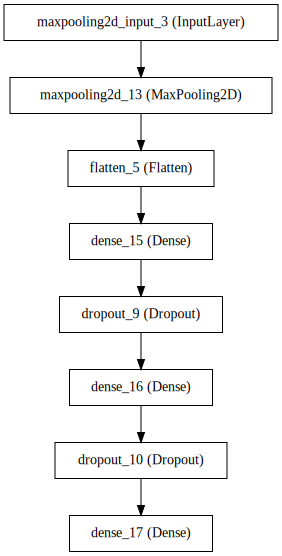

In [26]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot
SVG(model_to_dot(bn_model).create(prog='dot', format='svg'))

In [47]:
def proc_wgts(layer): return [o/2 for o in layer.get_weights()]

In [18]:
def get_fc_model():
    model = Sequential([
        MaxPooling2D(input_shape=conv_layers[-1].output_shape[1:]),
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(8, activation='softmax')
        ])

    for l1,l2 in zip(model.layers, fc_layers): l1.set_weights(proc_wgts(l2))
    model.compile(Adam(lr=0.01),loss='categorical_crossentropy',  metrics=['accuracy'])
    return model

# bn_model.fit(conv_feat, trn_labels, batch_size=batch_size, nb_epoch=3, 
#              validation_data=(conv_val_feat, val_labels))




In [13]:
from keras.callbacks import History 
history = History()

In [15]:
class_acc=[]
val_class_acc=[]
class_loss=[]
val_class_loss=[]

In [16]:
class_acc_percent = []
for i in class_acc:
    i = i * 100
    class_acc_percent.append(i)
    
val_class_acc_percent = []
for i in val_class_acc:
    i = i * 100
    val_class_acc_percent.append(i)

In [27]:
save_array(path+'results/trn_640.dat', trn)
save_array(path+'results/val_640.dat', val)
save_array(path+'results/test_640.dat', test)

In [6]:
trn = load_array(path+'results/trn_640.dat')
val = load_array(path+'results/val_640.dat')
test = load_array(path+'results/test_640.dat')

In [7]:
vgg640 = Vgg16BN((360, 640)).model
vgg640.pop()
vgg640.input_shape, vgg640.output_shape
vgg640.compile(Adam(), 'categorical_crossentropy', metrics=['accuracy'])

In [8]:
conv_val_feat = load_array(path+'results/conv_val_640.dat')
conv_trn_feat = load_array(path+'results/conv_trn_640.dat')
conv_test_feat = load_array(path+'results/conv_test_640.dat')

In [12]:
def conv2d_bn(x, nb_filter, nb_row, nb_col, subsample=(1, 1)):
    x = Convolution2D(nb_filter, nb_row, nb_col,
                      subsample=subsample, activation='relu', border_mode='same')(x)
    return BatchNormalization(axis=1)(x)

In [13]:
def incep_block(x):
    branch1x1 = conv2d_bn(x, 32, 1, 1, subsample=(2, 2))
    branch5x5 = conv2d_bn(x, 24, 1, 1)
    branch5x5 = conv2d_bn(branch5x5, 32, 5, 5, subsample=(2, 2))

    branch3x3dbl = conv2d_bn(x, 32, 1, 1)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 48, 3, 3)
    branch3x3dbl = conv2d_bn(branch3x3dbl, 48, 3, 3, subsample=(2, 2))

    branch_pool = AveragePooling2D(
        (3, 3), strides=(2, 2), border_mode='same')(x)
    branch_pool = conv2d_bn(branch_pool, 16, 1, 1)
    return merge([branch1x1, branch5x5, branch3x3dbl, branch_pool],
              mode='concat', concat_axis=1)

In [9]:
inp = Input(vgg640.layers[-1].output_shape[1:]) 
# x = BatchNormalization(axis=1)(inp)
# x = incep_block(x)
# x = incep_block(x)
# x = incep_block(x)
# x = Dropout(0.75)(x)
# x = Convolution2D(8,3,3, border_mode='same')(x)
# x = GlobalAveragePooling2D()(x)
# outp = Activation('softmax')(x)

In [17]:
lrg_model = Model([inp], outp)

In [18]:
lrg_model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
bn_model.save_weights(path+'models/conv_512_6.h5')

In [ ]:
bn_model.evaluate(conv_val_feat, val_labels)

In [8]:
conv_layers,_ = split_at(vgg640, Convolution2D)

In [9]:
nf=128; p=0.

In [10]:
def get_lrg_layers():
    return [
        BatchNormalization(axis=1, input_shape=conv_layers[-1].output_shape[1:]),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        MaxPooling2D(),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        MaxPooling2D(),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        MaxPooling2D((1,2)),
        Convolution2D(8,3,3, border_mode='same'),
        Dropout(p),
        GlobalAveragePooling2D(),
        Activation('softmax')
    ]


In [11]:
lrg_model = Sequential(get_lrg_layers())
lrg_model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

th


In [ ]:
lrg_model.optimizer.lr=1e-2

In [15]:
history_list = history.history
class_acc += history_list['acc']
val_class_acc += history_list['val_acc']
class_loss += history_list['loss']
val_class_loss += history_list['val_loss']
print len(class_acc)

4


In [16]:
lrg_model.optimizer.lr=1e-3

In [18]:
history_list = history.history
class_acc += history_list['acc']
val_class_acc += history_list['val_acc']
class_loss += history_list['loss']
val_class_loss += history_list['val_loss']
print len(class_acc)

6


In [37]:
p = 0.6

In [38]:
nf=128; p=0

In [60]:
def get_lrg_layers():
    return [
        BatchNormalization(axis=1, input_shape=conv_layers[-1].output_shape[1:]),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        MaxPooling2D(),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        MaxPooling2D(),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        MaxPooling2D((1,2)),
        Convolution2D(8,3,3, border_mode='same'),
        Dropout(p),
        GlobalAveragePooling2D(),
        Activation('softmax')
    ]

In [61]:
lrg_model = Sequential(get_lrg_layers())

th


In [39]:


x = BatchNormalization(axis=1, input_shape=(512,14,14))(inp)
x = Convolution2D(128,3,3, activation='relu', border_mode='same')(x)
x = BatchNormalization(axis=1)(x)
x = Convolution2D(128,3,3, activation='relu', border_mode='same')(x)
x = BatchNormalization(axis=1)(x)
x = Convolution2D(128,3,3, activation='relu', border_mode='same')(x)
x = BatchNormalization(axis=1)(x)
x = MaxPooling2D()(x)
x_b = Convolution2D(4,3,3, border_mode='same')(x)
x_bb = GlobalAveragePooling2D(name='bb')(x_b)
x_c = Convolution2D(8,3,3, border_mode='same')(x)
x_c = GlobalAveragePooling2D()(x_c)
x_class = Activation('softmax', name = 'class')(x_c)


NameError: name 'inp' is not defined

In [19]:
model = Model([inp], [x_bb, x_class])
model.compile(Adam(lr=0.01), loss=['mse', 'categorical_crossentropy'], metrics=['accuracy'],
             loss_weights=[.001, 1.])

In [23]:
class_acc=[]
val_class_acc=[]
class_loss=[]
val_class_loss=[]

In [25]:
history_list = history.history
class_acc += history_list['class_acc']
val_class_acc += history_list['val_class_acc']
class_loss += history_list['class_loss']
val_class_loss += history_list['val_class_loss']
print len(class_acc)

10


In [27]:
history_list = history.history
class_acc += history_list['class_acc']
val_class_acc += history_list['val_class_acc']
class_loss += history_list['class_loss']
val_class_loss += history_list['val_class_loss']
print len(class_acc)

20


In [29]:
history_list = history.history
class_acc += history_list['class_acc']
val_class_acc += history_list['val_class_acc']
class_loss += history_list['class_loss']
val_class_loss += history_list['val_class_loss']
print len(class_acc)

28


In [76]:
class_acc = class_acc[0:9]
val_class_acc = val_class_acc[0:9]
class_loss = class_loss[0:9]
val_class_loss = val_class_loss[0:9]
print len(class_acc)

9


In [139]:
history_list = history.history
class_acc += history_list['class_acc']
val_class_acc += history_list['val_class_acc']
class_loss += history_list['class_loss']
val_class_loss += history_list['val_class_loss']
print len(class_acc)
# print class_acc


56


In [8]:
from keras.callbacks import History 
history = History()

In [102]:
model.save_weights(path+'models/bn_anno02.h5')

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import backend as K
from keras.optimizers import SGD, RMSprop
opt = RMSprop(lr=0.00001, rho=0.7)
model = vgg_ft(8)
layers = model.layers
last_conv_idx = [index for index,layer in enumerate(layers) if type(layer) is keras.layers.convolutional.Convolution2D][-1]
# fc_layers = layers[last_conv_idx+1:]
conv_layers = layers[:last_conv_idx+1]
conv_model = Sequential(conv_layers)
# fc_model = get_fc_model()
for layer in conv_model.layers: layer.trainable = False
# Look how easy it is to connect two models together!
# conv_model.add(fc_model)
conv_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
conv_model.save_weights(model_path + 'aug4.h5')

In [9]:
p=0.6
def get_bn_layers(p):
    return [
        MaxPooling2D(input_shape=conv_layers[-1].output_shape[1:]),
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(p),
        BatchNormalization(),
        Dense(4096, activation='relu'),
        Dropout(p),
        BatchNormalization(),
        Dense(8, activation='softmax')
        ]
bn_model = Sequential(get_bn_layers(0.6))
bn_layers = get_bn_layers(0.6)
bn_layers.pop()
bn_layers.append(Dense(8,activation='softmax'))

In [10]:
final_model = Sequential(conv_layers)
for layer in final_model.layers: layer.trainable = False
for layer in bn_layers: final_model.add(layer)

In [11]:
for l1,l2 in zip(bn_model.layers, bn_layers):
    l2.set_weights(l1.get_weights())

In [12]:
final_model.compile(optimizer=Adam(), 
                    loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
final_model.save_weights(model_path + 'final1.h5')

In [15]:
final_model.optimizer.lr = 0.001

In [2]:
# gen = image.ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# gen = image.ImageDataGenerator(rotation_range=10, width_shift_range=0.1, width_zoom_range=0.2, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, channel_shift_range=10., horizontal_flip=True)

# gen = image.ImageDataGenerator(rotation_range=10, width_shift_range=0.05,width_zoom_range=0.05, height_shift_range=0.05, shear_range=0.05, zoom_range=0.05, channel_shift_range=10, horizontal_flip=True)

# gen = image.ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1, horizontal_flip=True)
# gen = image.ImageDataGenerator(rotation_range=8, width_shift_range=0.08, height_shift_range=0.08, zoom_range=0.08, shear_range=0.3)

batch_size = 64
# NB: We don't want to augment or shuffle the validation set
val_batches = get_batches(valid_path, shuffle=False, batch_size=batch_size)
test_batches = get_batches(test_path, shuffle=False, batch_size=batch_size)

Found 373 images belonging to 8 classes.
Found 1000 images belonging to 1 classes.


In [2]:
batch_size = 64


In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
# from keras import backend as K
# from keras.optimizers import SGD

def get_bn_layers(conv_layers, p):
    return [
        MaxPooling2D(input_shape=conv_layers[-1].output_shape[1:]),
        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(p),
        BatchNormalization(),
        Dense(4096, activation='relu'),
        Dropout(p),
        BatchNormalization(),
        Dense(8, activation='softmax')
            ]

def get_model():
    model = vgg_ft(8)
    layers = model.layers
    last_conv_idx = [index for index,layer in enumerate(layers) if type(layer) is keras.layers.convolutional.Convolution2D][-1]
    conv_layers = layers[:last_conv_idx+1]
    final_model = Sequential(conv_layers)
    drop_out_rate=0.5
    bn_model = Sequential(get_bn_layers(conv_layers, drop_out_rate))
    bn_layers = get_bn_layers(conv_layers, drop_out_rate)
    bn_layers.pop()
    bn_layers.append(Dense(8,activation='softmax'))
    for layer in final_model.layers: 
        layer.trainable = False
    for layer in bn_layers: 
        final_model.add(layer)
    for l1,l2 in zip(bn_model.layers, bn_layers):
        l2.set_weights(l1.get_weights())
    final_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return final_model

In [4]:
def fit_model():
    model = get_model()
#     model.optimizer.lr=0.001
#     model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=1, 
#                         validation_data=val_batches, nb_val_samples=val_batches.nb_sample)
    
#     model.optimizer.lr=0.1
#     model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=4, 
#                         validation_data=val_batches, nb_val_samples=val_batches.nb_sample)
#     print ('0.1 learning rate ------------done----------')
#     model.optimizer.lr=0.01
#     model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=4, 
#                         validation_data=val_batches, nb_val_samples=val_batches.nb_sample)
#     print ('0.01 learning rate ------------done----------')
#     model.optimizer.lr=0.001
#     model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=4, 
#                         validation_data=val_batches, nb_val_samples=val_batches.nb_sample)
#     print ('0.001 learning rate ------------done----------')
#     model.optimizer.lr=0.0001
#     model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=4, 
#                         validation_data=val_batches, nb_val_samples=val_batches.nb_sample)
#     print ('0.0001 learning rate ------------done----------')
#     model.optimizer.lr=0.00001
#     model.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=4, 
#                         validation_data=val_batches, nb_val_samples=val_batches.nb_sample)
#     print ('0.00001 learning rate ------------done----------')
    return model

In [32]:
models.save_weights(path + 'sample_vertical_and_horizontal_flip03.h5')

In [30]:
gen = image.ImageDataGenerator(channel_shift_range=10)
batches = get_batches(train_path, gen, batch_size=batch_size)
model_01 = fit_model()
    


Found 3777 images belonging to 8 classes.


In [8]:
test_data= get_data(test_path)

Found 1000 images belonging to 1 classes.


In [ ]:
preds = model_01.predict()

In [15]:
model_01.save_weights(path + 'vgg_shear0.05_dropout0.5_model02_subset01.h5')

In [17]:
model_01.save_weights(path + 'vgg_shear0.05_dropout0.5_model03_subset01.h5')

In [13]:
preds = model_01.predict(test_data, batch_size = batch_size * 2)

In [17]:
train_batches.N


3404

In [31]:
??MixIterator

In [21]:
mi = MixIterator([train_batches, test_batches, val_batches])

In [48]:
model_01.save_weights(path + 'vgg_shear0.05_dropout0.5_model02_subset02.h5')

In [18]:
model_01.load_weights(path + 'vgg_shear0.05_dropout0.5_model01_subset01.h5')

In [19]:
model_01.load_weights(path + 'vgg_mnist_1.h5')

In [79]:
model_01.load_weights(path + 'vgg_mnist_0_sub10.h5')

In [31]:
val_data = get_data(valid_path)

Found 373 images belonging to 8 classes.


In [12]:
model_01.load_weights(path + 'trainset_01shear0.05_02no_aug_dropout0.5_model_mnist_0_sub02.h5')

In [31]:
model_01.load_weights(path + 'trainset_01shear0.05_02no_aug_dropout0.5_model_mnist_0_sub03.h5')

In [ ]:
model_01.load_weights(path + 'vgg_mnist_1.h5')
model_01.optimizer.lr=0.00001
model_01.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=10, 
                        validation_data=val_batches, nb_val_samples=val_batches.nb_sample)
model_01.optimizer.lr=0.000005
model_01.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=10, 
                        validation_data=val_batches, nb_val_samples=val_batches.nb_sample)
model_01.save_weights(path + 'vgg_mnist_1_sub02.h5')



model_01.load_weights(path + 'vgg_mnist_1.h5')
model_01.optimizer.lr=0.00001
model_01.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=10, 
                        validation_data=val_batches, nb_val_samples=val_batches.nb_sample)
model_01.optimizer.lr=0.000005
model_01.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=10, 
                        validation_data=val_batches, nb_val_samples=val_batches.nb_sample)
model_01.save_weights(path + 'vgg_mnist_1_sub02.h5')

model_01.load_weights(path + 'vgg_mnist_2.h5')
model_01.optimizer.lr=0.00001
model_01.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=10, 
                        validation_data=val_batches, nb_val_samples=val_batches.nb_sample)
model_01.optimizer.lr=0.000005
model_01.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=10, 
                        validation_data=val_batches, nb_val_samples=val_batches.nb_sample)
model_01.save_weights(path + 'vgg_mnist_2_sub02.h5')

model_01.load_weights(path + 'vgg_mnist_3.h5')
model_01.optimizer.lr=0.00001
model_01.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=10, 
                        validation_data=val_batches, nb_val_samples=val_batches.nb_sample)
model_01.optimizer.lr=0.000005
model_01.fit_generator(batches, samples_per_epoch=batches.nb_sample, nb_epoch=10, 
                        validation_data=val_batches, nb_val_samples=val_batches.nb_sample)
model_01.save_weights(path + 'vgg_mnist_3_sub02.h5')



In [ ]:
model_01.save_weights(path + 'vgg_shear0.05_dropout0.5_model_test01_subset02.h5')

In [ ]:
for i,m in enumerate(models):
    m.save_weights(path + 'vgg_mnist_'  + str(i) + '.h5')

In [ ]:
for i,m in enumerate(models):
    m.save_weights(path + 'vgg_mnist_' + str(i) + '.pkl')

In [ ]:
preds = all_preds.mean(axis=0)

In [ ]:
rotation_range=10, width_shift_range=0.1, 
       height_shift_range=0.1, width_zoom_range=0.2, shear_range=0.15, zoom_range=0.1, 
       channel_shift_range=10., horizontal_flip=True

In [32]:
gen = image.ImageDataGenerator(rotation_range=15, width_shift_range=0.1, 
                               height_shift_range=0.1, zoom_range=0.1, horizontal_flip=True)

batch_size=64
batches = get_batches(train_path, gen, batch_size=batch_size)
# batches = get_batches(train_path, batch_size=batch_size)
# NB: We don't want to augment or shuffle the validation set
val_batches = get_batches(valid_path, shuffle=False, batch_size=batch_size)
test_batches = get_batches(test_path, shuffle=False, batch_size=batch_size)

Found 3777 images belonging to 8 classes.
Found 722 images belonging to 8 classes.
Found 1000 images belonging to 1 classes.


In [22]:
??gen.get_batches

In [ ]:
vgg = Vgg16()
model=vgg.model
last_conv_idx = [i for i,l in enumerate(model.layers) if type(l) is Convolution2D][-1]
conv_layers = model.layers[:last_conv_idx+1]
conv_model = Sequential(conv_layers)

In [51]:
val_features = conv_model.predict_generator(val_batches, val_batches.nb_sample)

In [ ]:
trn_features_01 = conv_model.predict_generator(batches, batches.nb_sample*10)

In [69]:
??conv_model.predict_generator

In [ ]:
test_features = conv_model.predict_generator(test_batches, test_batches.nb_sample)

In [24]:
??get_classes()

In [25]:
??get_batches()

In [10]:
trn_labels = np.vstack((trn_labels,trn_labels, trn_labels, trn_labels, trn_labels))

In [37]:
save_array(model_path + 'da_train_convlayer_features.bc', trn_features)
save_array(model_path + 'valid_convlayer_features.bc', val_features)
save_array(model_path + 'test_convlayer_features.bc', test_features)

In [11]:
save_array(model_path + 'da_train_convlayer_features_01.bc', trn_features_01)

In [12]:
trn_features = load_array(model_path + 'da_train_convlayer_features_01.bc')
val_features = load_array(model_path + 'valid_convlayer_features.bc')
test_features = load_array(model_path + 'test_convlayer_features.bc')
trn_features.shape

(18885, 512, 14, 14)

In [27]:
preds = bn_model.predict(test_features, batch_size=batch_size*2)

In [13]:
def get_bn_layers(p):
    return [
        MaxPooling2D(input_shape=conv_layers[-1].output_shape[1:]),
        Flatten(),
        Dropout(p/2),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(p/2),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(p),
        Dense(8, activation='softmax')
        ]

In [14]:
p=0.8

In [15]:
from keras.models import Sequential
bn_model = Sequential(get_bn_layers(p))
bn_model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print trn_features.shape, trn_labels.shape
print val_features.shape, val_labels.shape

In [ ]:
bn_model.fit(trn_features, trn_labels, batch_size=batch_size, nb_epoch=4, 
             validation_data=(val_features, val_labels))

In [84]:
bn_model.load_weights(model_path+'latest_weights_no_aug.h5')

In [23]:
bn_model.save_weights(model_path+'latest_weights_aug01.h5')

In [26]:
bn_model.load_weights(model_path+'latest_weights_aug01.h5')

In [69]:

# Copy the weights from the pre-trained model.
# NB: Since we're removing dropout, we want to half the weights


In [91]:
??fc_model

In [88]:
fc_model.save_weights(model_path+'no_dropout01.h5')

In [4]:
vgg = Vgg16()

In [5]:
batch_size=64
no_of_epochs=10

In [9]:
??ImageDataGenerator

Object `ImageDataGenerator` not found.


In [7]:
gen = image.ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1, horizontal_flip=True)
batches = vgg.get_batches(train_path, gen, batch_size=batch_size)
val_batches = vgg.get_batches(valid_path, batch_size=batch_size*2)
vgg.finetune(batches)
vgg.model.optimizer.lr = 0.01   # ?

Found 3404 images belonging to 8 classes.
Found 373 images belonging to 8 classes.


In [ ]:
# 4 generate predictions

In [6]:
??vgg.test()

In [9]:
model = vgg.model
layers = model.layers

In [19]:
??vgg.finetune

In [32]:
?vgg.model.save_array

Object `vgg.model.save_array` not found.


In [ ]:
# 5 validate the preds

In [18]:
expected_labels = val_batches.classes #0 or 1

#Round our predictions to 0/1 to generate labels
our_predictions = preds[:]
our_labels = np.round(1-our_predictions)

In [ ]:
# 6 submit

In [ ]:
print "Raw Predictions: " + str(preds[:5])